### PCA-v5
```
Filename: PCA-v5.ipynb
Last Update Date: 8-Jul-2018

Description:
Take full featured CSV file (577 features, f0...f576 + label) and use parameter retainVariance
with PCA which returns reduced columns (95% gives 178 features in this case).  Write this into a CSV file
Approximate Run time: 5 mins
```

In [2]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import datetime

In [3]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-10 12:10:55


In [4]:
# Setup parameters
fileNameNoPrefix = "Librosa120Sec577FeatsCSVExtract20_v3"
retainVariance = 0.99 # retain percentage variance = 95%

In [5]:
df = pd.read_csv(filepath_or_buffer=(fileNameNoPrefix + '.gzip'), sep=',', compression='gzip')
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

In [6]:
x_data = df.drop('label',axis=1)

In [7]:
x_data.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f567', 'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575',
       'f576'],
      dtype='object', length=577)

In [28]:
y_data = df["label"].values
y_data

array([0., 0., 0., ..., 1., 1., 1.])

In [8]:
features = StandardScaler().fit_transform(x_data)

In [30]:
type(features)

numpy.ndarray

In [9]:
# Create a PCA that will retain 99% of variance 
pca = PCA(n_components=retainVariance, whiten = True)

In [10]:
# Conduct PCA 
features_pca = pca.fit_transform( features)

In [11]:
# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 577
Reduced number of features: 296


In [12]:
pca.components_.shape

(296, 577)

In [13]:
n_top_feats = pca.components_.shape[0]
n_top_feats

296

In [14]:
loading_scores = pd.Series(pca.components_[0])
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_feats = sorted_loading_scores[0:n_top_feats].index.values
top_feats

array([415, 347, 346, 416, 444, 356, 390, 383, 410, 414, 454, 405, 391,
       453, 480, 337, 384, 443, 336, 381, 434, 469, 357, 358, 394, 304,
       440, 345, 397, 370, 427, 428, 372, 324, 398, 341, 393, 402, 373,
       468, 476, 446, 197, 433, 479, 417, 423, 488, 353, 368, 467, 429,
       409, 310, 196, 288, 463, 371, 426, 478, 359, 275, 432, 420, 382,
       406, 445, 477, 330, 305, 462, 459, 385, 431, 369, 401, 380, 455,
       466, 465, 481, 418, 367, 389, 450, 313, 512, 195, 438, 422, 379,
       248, 198, 366, 456, 335, 299, 513, 482, 439, 489, 344, 323, 502,
       276, 407, 311, 327, 460, 487, 496, 200, 403, 362, 374, 490, 499,
       355, 329, 514, 419, 392, 312, 360, 461, 475, 447, 295, 396, 494,
       282, 495, 348, 408, 326, 354, 399, 331, 194, 199, 442, 437, 507,
       404, 270, 497, 349, 470, 361, 294, 325, 530, 501, 421, 457, 328,
       338, 300, 525, 319, 493, 377, 249, 506, 441, 340, 413, 320, 451,
       500, 486, 531, 498, 287, 318, 435, 449, 292, 452, 376, 23

In [15]:
## print the first 10 feature names and their scores (and +/- sign)
loading_scores[top_feats][:10]

415    0.061801
347    0.060763
346    0.060634
416    0.060278
444    0.060071
356    0.059834
390    0.059671
383    0.059643
410    0.059601
414    0.059437
dtype: float64

### Write CSV with reduced PCA features

In [16]:
newHeadList = ["f" + str(i) for i in top_feats]

In [17]:
newHeadList.append("label")

In [18]:
newDF = df.copy()

In [19]:
oldHeadList = newDF.columns
oldHeadList

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f568', 'f569', 'f570', 'f571', 'f572', 'f573', 'f574', 'f575', 'f576',
       'label'],
      dtype='object', length=578)

In [20]:
dropColList = [x for x in oldHeadList if x not in newHeadList]

In [21]:
newDF = newDF.drop(labels=dropColList, axis=1)

In [22]:
newDF.columns

Index(['f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f203',
       'f207',
       ...
       'f530', 'f531', 'f532', 'f537', 'f538', 'f539', 'f540', 'f541', 'f543',
       'label'],
      dtype='object', length=297)

In [23]:
newDF.to_csv(path_or_buf=(fileNameNoPrefix + "_ReducedPCA" + str(n_top_feats) + ".gzip"), sep=",", index=False, 
             header=newHeadList, compression='gzip')

In [24]:
now = datetime.datetime.now()
print (now.strftime("%Y-%m-%d %H:%M:%S"))

2018-07-10 12:19:39


In [25]:
from matplotlib import pyplot as plt

def plot_step_lda(newX_data, newY_data):

    label_dict = {0: 'Sad', 1: 'Happy'}

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,2),('^', 's'),('blue', 'red')):

        plt.scatter(x=newX_data[:,0].real[newY_data == label],
                y=newX_data[:,1].real[newY_data == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


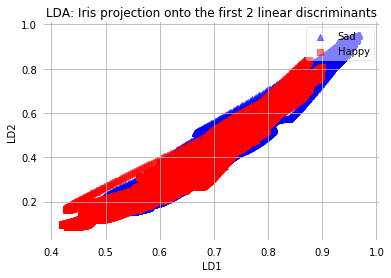

In [26]:
newX_dataDF = newDF.drop("label", axis=1)
newY_data = newDF["label"].values
# Convert dataframe to numpy
newX_data = newX_dataDF.as_matrix(columns=None)
plot_step_lda(newX_data, newY_data)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


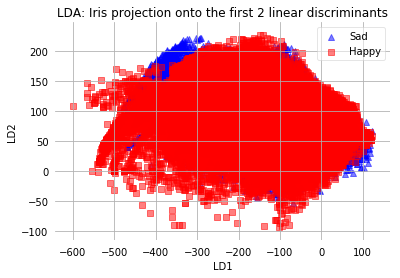

In [29]:
plot_step_lda(x_data.as_matrix(columns=None), y_data)

C:\Users\USWU32441\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


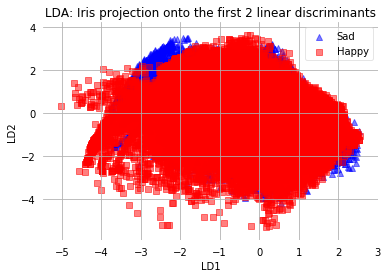

In [31]:
plot_step_lda(features, y_data)